# 🪄 옵티마이저

### 📥 Import

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
print(f'현재 작업 디렉토리: "{os.getcwd()}"')

from common.functions import *
from common.gradient import numerical_gradient
from common.layers import *
from dataset.mnist import load_mnist

현재 작업 디렉토리: "g:\zer0ken\ms-ai-school\neural-net\ch05 학습 기술"


### 🔮 확률적 경사 하강법
SGD: Stochastic Gradient Discent

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 🛝 모멘텀
Momentum

In [4]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {k: np.zeros_like(v) for k, v in params.items()}
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

### 🦎 AdaGrad
AdaGrad: Adaptive Gradient Algorithm

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {k: np.zeros_like(v) for k, v in params.items()}
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 🤖 Adam
Adam: Adaptive Moment Estimation

In [6]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

### 🪄 임의의 함수에 대한 매개변수 최적화

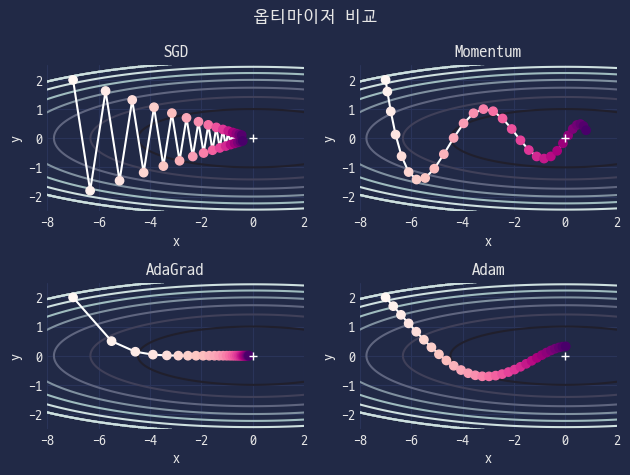

In [12]:
def f(x, y):
    return x ** 2 / 20.0 + y ** 2


def df(x, y):
    return x / 10.0, 2.0 * y


init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos
grads = {'x': 0, 'y': 0}

optimizers = {
    'SGD': SGD(lr=0.95),
    'Momentum': Momentum(lr=0.1),
    'AdaGrad': AdaGrad(lr=1.5),
    'Adam': Adam(lr=0.3)
}

idx = 1

for optimizer_name, optimizer in optimizers.items():
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    mask = Z > 7
    Z[mask] = 0
    
    plt.subplot(2, 2, idx)
    idx += 1
    
    plt.contour(X, Y, Z, cmap=plt.cm.bone)
    plt.plot(x_history, y_history, '-w')
    
    c = list(range(len(x_history)))
    plt.scatter(x_history, y_history, c=c, zorder=2, marker='o')
    
    plt.ylim(-2.5, 2.5)
    plt.xlim(-8, 2)
    plt.plot(0, 0, '+w')
    plt.title(optimizer_name)
    plt.xlabel('x')
    plt.ylabel('y')
    
plt.suptitle('옵티마이저 비교')
plt.tight_layout()
plt.show()